### 그래디언트 부스팅

In [2]:
# 데이터 구성: Sereis, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 분류모델 평가함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
import os
os.chdir("/home/piai/실습화일/2. Big Data 분석")
df_raw = pd.read_csv("./HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw.isnull().sum()

/tmp/ipykernel_891/2907708905.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
# 목표변수, 설명변수 데이터 지정
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("분할 전 설명변수 데이터 : {}".format(df_train_x.shape))
print("분할 후 설명변수 데이터 : Train {} Test {}".format(df_train_y.shape, df_test_x.shape))

분할 전 설명변수 데이터 : (2623, 18)
분할 후 설명변수 데이터 : Train (2623,) Test (1125, 18)


In [9]:
# 모델 생성(기본 옵션, 랜덤하게)
gb_uncust = GradientBoostingClassifier(random_state = 1234)
gb_uncust.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [10]:
# 모델 옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [13]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# learning_rate: 학습률 변경 0.1~0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


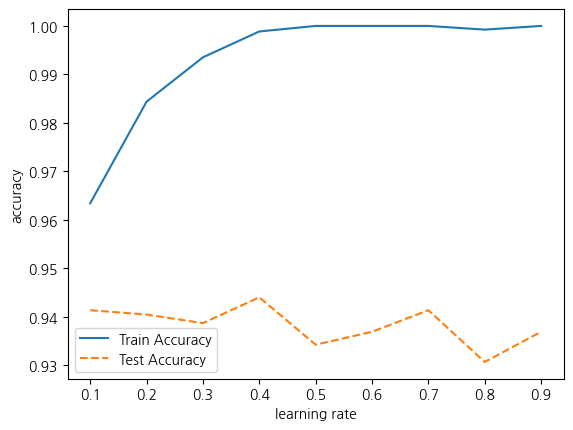

In [14]:
# 모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_lr,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("learning rate"); plt.ylabel("accuracy")
plt.legend()

In [16]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# n_estimators: 트리 수 변경 1~150
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


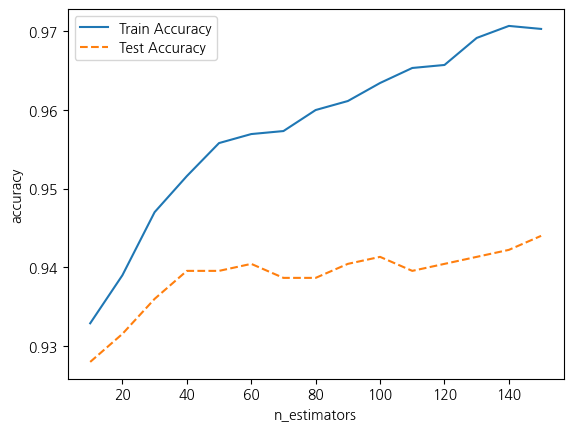

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [19]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# max_depth : 최대 깊이 변경 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators = 100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.940
5,6,0.998,0.950
6,7,1.000,0.947
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


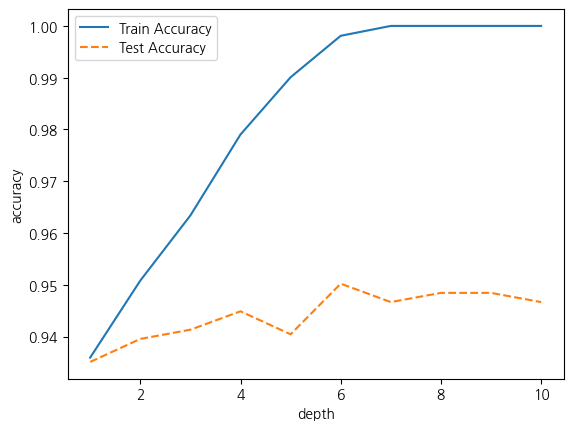

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("depth"); plt.ylabel("accuracy")
plt.legend()

In [21]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 20~100
para_split = [n_split*10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                max_depth = 6, n_estimators = 100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.995,0.942
1,30,0.994,0.940
2,40,0.992,0.945
3,50,0.992,0.942
4,60,0.989,0.947
5,70,0.988,0.943
6,80,0.986,0.944
7,90,0.987,0.945
8,100,0.984,0.944


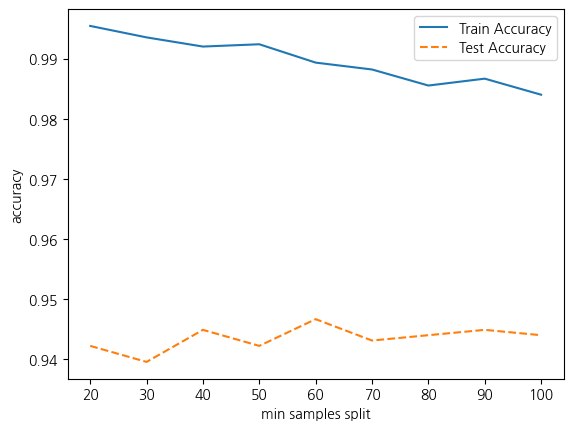

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [23]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 최소 자료 수 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 6, n_estimators = 100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.998,0.943
1,10,0.995,0.948
2,15,0.991,0.949
3,20,0.990,0.948
4,25,0.987,0.945
5,30,0.984,0.943
6,35,0.984,0.943
7,40,0.982,0.944
8,45,0.982,0.943
9,50,0.978,0.943


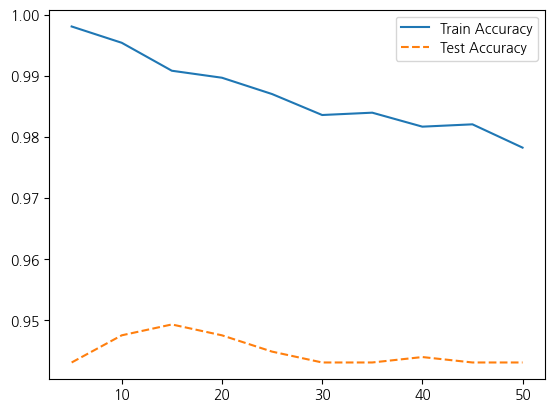

In [24]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.legend()

In [25]:
# 최종모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 15, max_depth = 6, n_estimators = 100, learning_rate = 0.1, random_state = 1234)

gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(gb_final.score(df_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.991
Accuracy on test set: 0.949
Confusion Matrix: 
[[1020    1]
 [  56   48]] 

              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



In [26]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.331
6,CLAGE,0.132
2,VALUE,0.105
5,DELINQ,0.096
8,CLNO,0.076
0,LOAN,0.069
3,YOJ,0.048
7,NINQ,0.041
1,MORTDUE,0.037
4,DEROG,0.035


Text(0, 0.5, '변수')

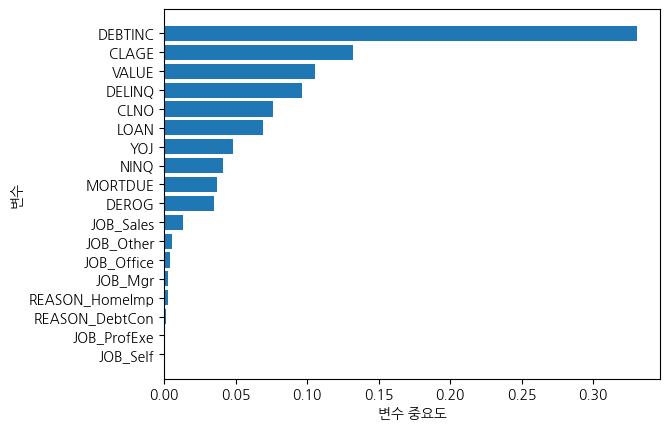

In [27]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

estimator = GradientBoostingClassifier(n_estimators = 100, random_state = 1234)

# 구하고자 하는 parameter와 범위
param_grid= {"learning_rate": para_lr,
             "max_depth": para_depth,
             "min_samples_leaf": para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)


print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

### XGBoost

In [31]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [29]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBClassifier

from xgboost import plot_importance

In [32]:
xgboost_uncust = XGBClassifier(random_state = 1234)
xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [35]:
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 사용자 모델 평가 : Train \n')
xgb_pred_train = xgboost_uncust.predict(df_train_x)
eval_class_model(df_train_y, xgb_pred_train)

print('\n 사용자 모델 평가 : Test \n')
xgb_pred_test = xgboost_uncust.predict(df_test_x)
eval_class_model(df_train_y, xgb_pred_train)


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 사용자 모델 평가 : Test 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000


In [37]:
xgboost_user = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state = 1234)

xgboost_user.fit(df_train_x, df_train_y)

xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))

xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  49  192]] 

정확도: 0.9813
정밀도: 1.0000
재현율: 0.7967
F1    : 0.8868
AUC   : 0.8983

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  63   41]] 

정확도: 0.9431
정밀도: 0.9762
재현율: 0.3942
F1    : 0.5616
AUC   : 0.6966

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [39]:
eval_df = [(df_test_x, df_test_y)]
xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state = 1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, eval_metric = "logloss", eval_set = eval_df, verbose = True)

print("최적 횟수: ", xgb_stop.best_iteration)
print("최적 성능(0-LogLoss): ", xgb_stop.best_score)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20589
[28]	validation_0-logloss:0.20396
[29]	validation_0-loglos

최적 횟수:  88
최적 성능(0-LogLoss):  0.18778899109673997


In [40]:
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  62   42]] 

정확도: 0.9440
정밀도: 0.9767
재현율: 0.4038
F1    : 0.5714
AUC   : 0.7014

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.40      0.57       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



{'LOAN': 494.0, 'MORTDUE': 525.0, 'VALUE': 565.0, 'YOJ': 421.0, 'DEROG': 95.0, 'DELINQ': 208.0, 'CLAGE': 545.0, 'NINQ': 165.0, 'CLNO': 445.0, 'DEBTINC': 592.0, 'REASON_DebtCon': 63.0, 'JOB_Mgr': 20.0, 'JOB_Office': 50.0, 'JOB_Other': 75.0, 'JOB_ProfExe': 31.0, 'JOB_Sales': 57.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

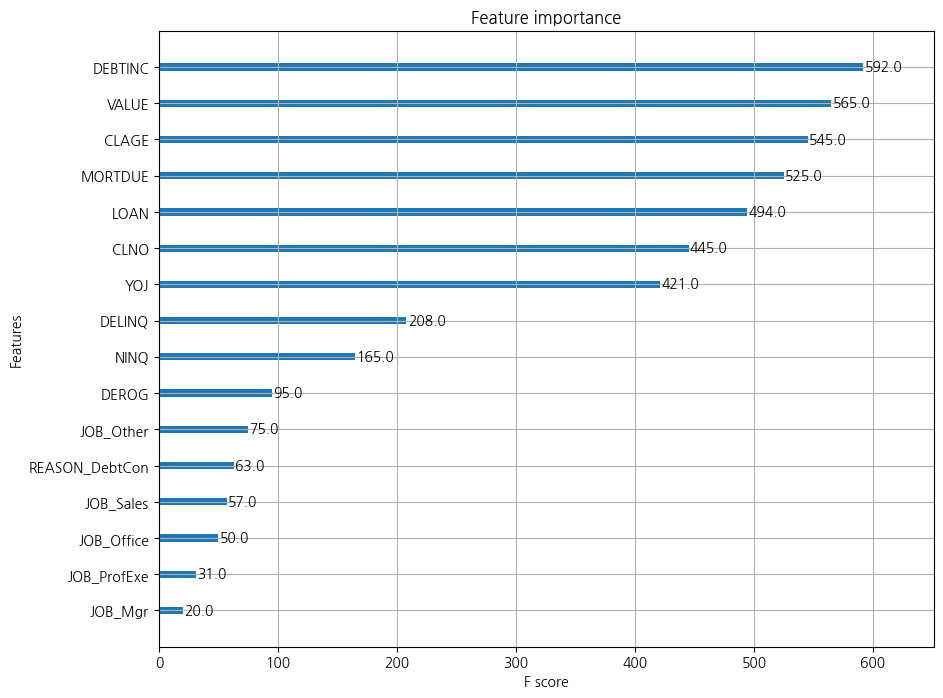

In [41]:
from xgboost import plot_importance
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize = (10, 8))
plot_importance(xgb_stop, ax = ax)

### LightGBM

In [42]:
#!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.4 MB/s eta 0:00:00m eta 0:00:010:01:01


In [43]:
from lightgbm import LGBMClassifier

from lightgbm import plot_importance

In [44]:
lgbm_uncust = LGBMClassifier(random_state = 1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [46]:
lgbm_uncust.fit(df_train_x, df_train_y)

print('\n 사용자 모델 평가 : Train \n')
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)

print('\n 사용자 모델 평가 : Test \n')
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_train_y, lgbm_pred_train)


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 사용자 모델 평가 : Test 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000


In [47]:
lgbm_user = LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 1234)

lgbm_user.fit(df_train_x, df_train_y)

lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  11  230]] 

정확도: 0.9958
정밀도: 1.0000
재현율: 0.9544
F1    : 0.9766
AUC   : 0.9772

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2382
           1       1.00      0.95      0.98       241

    accuracy                           1.00      2623
   macro avg       1.00      0.98      0.99      2623
weighted avg       1.00      1.00      1.00      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  58   46]] 

정확도: 0.9467
정밀도: 0.9583
재현율: 0.4423
F1    : 0.6053
AUC   : 0.7202

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       0.96      0.44      0.61       104

    accuracy                           0.95      1125
   macro avg       0.95      0.72      0.79      1125
weighted avg       0.95      0.95      0.94      1125



In [51]:
eval_df = [(df_test_x, df_test_y)]
lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state = 1234)
lgbm_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, eval_metric = "logloss", eval_set = eval_df, verbose = True)

print("최적 횟수: ", lgbm_stop.best_iteration_)
print("최적 성능(0-LogLoss): ", lgbm_stop.best_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/piai/anaconda3/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.28511
[2]	valid_0's binary_logloss: 0.27066
[3]	valid_0's binary_logloss: 0.260079
[4]	valid_0's binary_logloss: 0.252409
[5]	valid_0's binary_logloss: 0.245952
[6]	valid_0's binary_logloss: 0.240127
[7]	valid_0's binary_logloss: 0.235029
[8]	valid_0's binary_logloss: 0.2314
[9]	valid_0's binary_logloss: 0.227222
[10]	valid_0's binary_logloss: 0.223771
[11]	valid_0's binary_logloss: 0.220513
[12]	valid_0's binary_logloss: 0.217729
[13]	valid_0's binary_logloss: 0.21576
[14]	valid_0's binary_logloss: 0.214048
[15]	valid_0's binary_logloss: 0.211407
[16]	valid_0's binary_logloss: 0.209553
[17]	valid_0's binary_logloss: 0.207832
[18]	valid_0's binary_logloss: 0.205522
[19]	valid_0's binary_logloss: 0.203077
[20]	valid_0's binary_logloss: 0.202195
[21]	valid_0's binary_logloss: 0.201263
[22]	valid_0's binary_logloss: 0.200804
[23]	valid_0's binary_logloss: 0.199671
[24]	valid_0's binary_logloss: 0.199349
[25]	valid_0's binary_logloss: 0.198783
[26]	valid_0's

In [52]:
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1    : 0.5960
AUC   : 0.7154

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       0.96      0.43      0.60       104

    accuracy                           0.95      1125
   macro avg       0.95      0.72      0.78      1125
weighted avg       0.95      0.95      0.94      1125



['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[195 172 188 144  51  89 181  77 170 218  20   1   8  12  24   7  20   0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

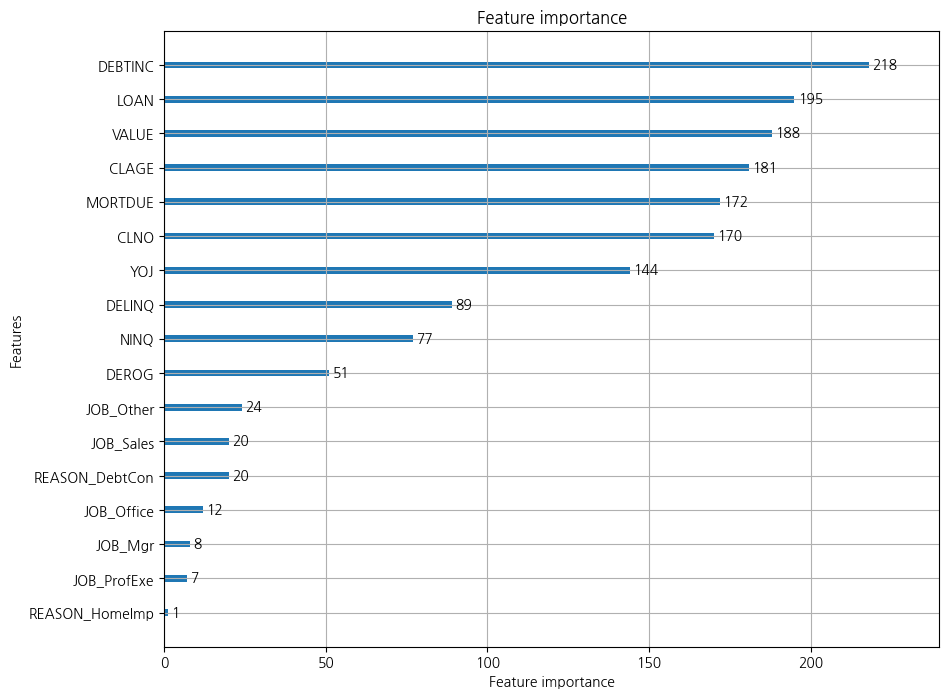

In [53]:
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)
fig, ax = plt.subplots(figsize = (10, 8))
plot_importance(lgbm_stop, ax = ax)

### CatBoost

In [54]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
from catboost import CatBoostClassifier

In [56]:
cbc_uncust = CatBoostClassifier(random_state = 1234)

In [58]:
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 사용자 모델 평가 : Train \n')
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 사용자 모델 평가 : Test \n')
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_train_y, cbc_pred_train)

Learning rate set to 0.015551
0:	learn: 0.6761244	total: 56.1ms	remaining: 56s
1:	learn: 0.6579079	total: 61.3ms	remaining: 30.6s
2:	learn: 0.6399682	total: 65.5ms	remaining: 21.8s
3:	learn: 0.6239700	total: 70.2ms	remaining: 17.5s
4:	learn: 0.6084344	total: 73.5ms	remaining: 14.6s
5:	learn: 0.5945777	total: 75.9ms	remaining: 12.6s
6:	learn: 0.5799344	total: 78.9ms	remaining: 11.2s
7:	learn: 0.5669553	total: 84ms	remaining: 10.4s
8:	learn: 0.5532509	total: 86ms	remaining: 9.47s
9:	learn: 0.5408740	total: 88ms	remaining: 8.71s
10:	learn: 0.5292223	total: 90ms	remaining: 8.09s
11:	learn: 0.5169985	total: 92.1ms	remaining: 7.58s
12:	learn: 0.5058216	total: 94.4ms	remaining: 7.17s
13:	learn: 0.4967484	total: 96.4ms	remaining: 6.79s
14:	learn: 0.4867250	total: 98.4ms	remaining: 6.46s
15:	learn: 0.4766792	total: 100ms	remaining: 6.18s
16:	learn: 0.4678698	total: 102ms	remaining: 5.92s
17:	learn: 0.4583963	total: 105ms	remaining: 5.7s
18:	learn: 0.4496975	total: 107ms	remaining: 5.5s
19:	lear

237:	learn: 0.1540494	total: 582ms	remaining: 1.86s
238:	learn: 0.1538297	total: 585ms	remaining: 1.86s
239:	learn: 0.1536878	total: 587ms	remaining: 1.86s
240:	learn: 0.1532797	total: 589ms	remaining: 1.85s
241:	learn: 0.1529618	total: 592ms	remaining: 1.85s
242:	learn: 0.1526024	total: 594ms	remaining: 1.85s
243:	learn: 0.1524535	total: 597ms	remaining: 1.85s
244:	learn: 0.1521369	total: 599ms	remaining: 1.84s
245:	learn: 0.1518654	total: 600ms	remaining: 1.84s
246:	learn: 0.1516530	total: 602ms	remaining: 1.84s
247:	learn: 0.1514253	total: 605ms	remaining: 1.83s
248:	learn: 0.1511379	total: 608ms	remaining: 1.83s
249:	learn: 0.1509485	total: 610ms	remaining: 1.83s
250:	learn: 0.1506952	total: 612ms	remaining: 1.83s
251:	learn: 0.1505925	total: 614ms	remaining: 1.82s
252:	learn: 0.1503476	total: 616ms	remaining: 1.82s
253:	learn: 0.1501734	total: 618ms	remaining: 1.81s
254:	learn: 0.1499544	total: 620ms	remaining: 1.81s
255:	learn: 0.1497500	total: 622ms	remaining: 1.81s
256:	learn: 

426:	learn: 0.1134489	total: 970ms	remaining: 1.3s
427:	learn: 0.1133143	total: 972ms	remaining: 1.3s
428:	learn: 0.1131842	total: 974ms	remaining: 1.3s
429:	learn: 0.1130692	total: 976ms	remaining: 1.29s
430:	learn: 0.1128204	total: 978ms	remaining: 1.29s
431:	learn: 0.1126760	total: 980ms	remaining: 1.29s
432:	learn: 0.1125032	total: 982ms	remaining: 1.29s
433:	learn: 0.1122978	total: 984ms	remaining: 1.28s
434:	learn: 0.1121485	total: 986ms	remaining: 1.28s
435:	learn: 0.1118490	total: 991ms	remaining: 1.28s
436:	learn: 0.1117527	total: 994ms	remaining: 1.28s
437:	learn: 0.1116322	total: 996ms	remaining: 1.28s
438:	learn: 0.1114219	total: 998ms	remaining: 1.27s
439:	learn: 0.1111272	total: 1000ms	remaining: 1.27s
440:	learn: 0.1109097	total: 1s	remaining: 1.27s
441:	learn: 0.1107559	total: 1s	remaining: 1.27s
442:	learn: 0.1107048	total: 1.01s	remaining: 1.26s
443:	learn: 0.1104810	total: 1.01s	remaining: 1.26s
444:	learn: 0.1102965	total: 1.01s	remaining: 1.26s
445:	learn: 0.110188

611:	learn: 0.0866729	total: 1.36s	remaining: 862ms
612:	learn: 0.0866162	total: 1.36s	remaining: 859ms
613:	learn: 0.0865013	total: 1.36s	remaining: 857ms
614:	learn: 0.0864319	total: 1.36s	remaining: 855ms
615:	learn: 0.0862332	total: 1.37s	remaining: 852ms
616:	learn: 0.0860752	total: 1.37s	remaining: 850ms
617:	learn: 0.0859607	total: 1.37s	remaining: 847ms
618:	learn: 0.0858346	total: 1.37s	remaining: 845ms
619:	learn: 0.0857118	total: 1.37s	remaining: 843ms
620:	learn: 0.0854002	total: 1.38s	remaining: 840ms
621:	learn: 0.0853283	total: 1.38s	remaining: 838ms
622:	learn: 0.0852444	total: 1.38s	remaining: 836ms
623:	learn: 0.0850199	total: 1.38s	remaining: 833ms
624:	learn: 0.0849508	total: 1.38s	remaining: 831ms
625:	learn: 0.0848950	total: 1.39s	remaining: 829ms
626:	learn: 0.0848061	total: 1.39s	remaining: 827ms
627:	learn: 0.0847344	total: 1.39s	remaining: 824ms
628:	learn: 0.0846634	total: 1.39s	remaining: 822ms
629:	learn: 0.0844856	total: 1.4s	remaining: 820ms
630:	learn: 0

786:	learn: 0.0662836	total: 1.75s	remaining: 473ms
787:	learn: 0.0661816	total: 1.75s	remaining: 471ms
788:	learn: 0.0661031	total: 1.75s	remaining: 468ms
789:	learn: 0.0660076	total: 1.75s	remaining: 467ms
790:	learn: 0.0659782	total: 1.76s	remaining: 465ms
791:	learn: 0.0659517	total: 1.76s	remaining: 462ms
792:	learn: 0.0658312	total: 1.76s	remaining: 460ms
793:	learn: 0.0657980	total: 1.76s	remaining: 458ms
794:	learn: 0.0657063	total: 1.77s	remaining: 456ms
795:	learn: 0.0654948	total: 1.77s	remaining: 453ms
796:	learn: 0.0653698	total: 1.77s	remaining: 451ms
797:	learn: 0.0653362	total: 1.77s	remaining: 449ms
798:	learn: 0.0653130	total: 1.77s	remaining: 447ms
799:	learn: 0.0652117	total: 1.78s	remaining: 444ms
800:	learn: 0.0651161	total: 1.78s	remaining: 442ms
801:	learn: 0.0650502	total: 1.78s	remaining: 440ms
802:	learn: 0.0649461	total: 1.78s	remaining: 438ms
803:	learn: 0.0649174	total: 1.78s	remaining: 435ms
804:	learn: 0.0648914	total: 1.79s	remaining: 433ms
805:	learn: 

964:	learn: 0.0526144	total: 2.14s	remaining: 77.5ms
965:	learn: 0.0525785	total: 2.14s	remaining: 75.3ms
966:	learn: 0.0525225	total: 2.14s	remaining: 73.1ms
967:	learn: 0.0524917	total: 2.14s	remaining: 70.9ms
968:	learn: 0.0524401	total: 2.15s	remaining: 68.7ms
969:	learn: 0.0523664	total: 2.15s	remaining: 66.4ms
970:	learn: 0.0523216	total: 2.15s	remaining: 64.2ms
971:	learn: 0.0522613	total: 2.15s	remaining: 62ms
972:	learn: 0.0522070	total: 2.15s	remaining: 59.8ms
973:	learn: 0.0520975	total: 2.16s	remaining: 57.6ms
974:	learn: 0.0520388	total: 2.16s	remaining: 55.4ms
975:	learn: 0.0519626	total: 2.16s	remaining: 53.2ms
976:	learn: 0.0518803	total: 2.16s	remaining: 50.9ms
977:	learn: 0.0517679	total: 2.17s	remaining: 48.7ms
978:	learn: 0.0517092	total: 2.17s	remaining: 46.5ms
979:	learn: 0.0516797	total: 2.17s	remaining: 44.3ms
980:	learn: 0.0516652	total: 2.17s	remaining: 42.1ms
981:	learn: 0.0516288	total: 2.17s	remaining: 39.8ms
982:	learn: 0.0516150	total: 2.17s	remaining: 37

In [68]:
cbc_user = CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state = 1234)

cbc_user.fit(df_train_x, df_train_y)

cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))

cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5909199	total: 6.45ms	remaining: 1.28s
1:	learn: 0.5032732	total: 12.2ms	remaining: 1.21s
2:	learn: 0.4353241	total: 15.9ms	remaining: 1.04s
3:	learn: 0.3862375	total: 19.9ms	remaining: 975ms
4:	learn: 0.3517100	total: 22.6ms	remaining: 880ms
5:	learn: 0.3239240	total: 24.9ms	remaining: 806ms
6:	learn: 0.3018276	total: 27.6ms	remaining: 762ms
7:	learn: 0.2850184	total: 30.3ms	remaining: 726ms
8:	learn: 0.2697382	total: 32.4ms	remaining: 687ms
9:	learn: 0.2581893	total: 34.8ms	remaining: 662ms
10:	learn: 0.2468526	total: 36.9ms	remaining: 633ms
11:	learn: 0.2364921	total: 38.9ms	remaining: 610ms
12:	learn: 0.2284698	total: 41ms	remaining: 589ms
13:	learn: 0.2239990	total: 43ms	remaining: 571ms
14:	learn: 0.2174115	total: 45ms	remaining: 555ms
15:	learn: 0.2116582	total: 47.1ms	remaining: 542ms
16:	learn: 0.2067886	total: 49.2ms	remaining: 529ms
17:	learn: 0.2039374	total: 50.9ms	remaining: 514ms
18:	learn: 0.1986265	total: 52.5ms	remaining: 500ms
19:	learn: 0.1962122	total: 

190:	learn: 0.0407161	total: 393ms	remaining: 18.5ms
191:	learn: 0.0403408	total: 395ms	remaining: 16.5ms
192:	learn: 0.0396821	total: 397ms	remaining: 14.4ms
193:	learn: 0.0393525	total: 399ms	remaining: 12.3ms
194:	learn: 0.0390261	total: 401ms	remaining: 10.3ms
195:	learn: 0.0388709	total: 403ms	remaining: 8.22ms
196:	learn: 0.0384803	total: 406ms	remaining: 6.18ms
197:	learn: 0.0381410	total: 408ms	remaining: 4.12ms
198:	learn: 0.0379563	total: 410ms	remaining: 2.06ms
199:	learn: 0.0377828	total: 412ms	remaining: 0us

 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  20  221]] 

정확도: 0.9924
정밀도: 1.0000
재현율: 0.9170
F1    : 0.9567
AUC   : 0.9585

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2382
           1       1.00      0.92      0.96       241

    accuracy                           0.99      2623
   macro avg       1.00      0.96      0.98      2623
weighted avg       0.99      0.99      0.99      2623


 사용자 모델 평가 : Test 


In [71]:
eval_df = [(df_test_x, df_test_y)]
cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state = 1234)
cbc_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, eval_set = eval_df, verbose = True)

print("최적 횟수: ", cbc_stop.best_iteration_)
print("최적 성능(0-LogLoss): ", cbc_stop.best_score_)

0:	learn: 0.5909199	test: 0.5906622	best: 0.5906622 (0)	total: 4.35ms	remaining: 1.3s
1:	learn: 0.5032732	test: 0.5053610	best: 0.5053610 (1)	total: 8.82ms	remaining: 1.31s
2:	learn: 0.4353241	test: 0.4377785	best: 0.4377785 (2)	total: 12.4ms	remaining: 1.23s
3:	learn: 0.3862375	test: 0.3906700	best: 0.3906700 (3)	total: 15.9ms	remaining: 1.18s
4:	learn: 0.3517100	test: 0.3599815	best: 0.3599815 (4)	total: 19.2ms	remaining: 1.13s
5:	learn: 0.3239240	test: 0.3335359	best: 0.3335359 (5)	total: 21.9ms	remaining: 1.07s
6:	learn: 0.3018276	test: 0.3128835	best: 0.3128835 (6)	total: 24.8ms	remaining: 1.04s
7:	learn: 0.2850184	test: 0.2972508	best: 0.2972508 (7)	total: 27.6ms	remaining: 1.01s
8:	learn: 0.2697382	test: 0.2841419	best: 0.2841419 (8)	total: 29.8ms	remaining: 964ms
9:	learn: 0.2581893	test: 0.2748417	best: 0.2748417 (9)	total: 32.1ms	remaining: 931ms
10:	learn: 0.2468526	test: 0.2659877	best: 0.2659877 (10)	total: 34.4ms	remaining: 905ms
11:	learn: 0.2364921	test: 0.2571756	best:

169:	learn: 0.0463761	test: 0.1758522	best: 0.1748131 (154)	total: 393ms	remaining: 300ms
170:	learn: 0.0462441	test: 0.1758554	best: 0.1748131 (154)	total: 395ms	remaining: 298ms
171:	learn: 0.0457113	test: 0.1762642	best: 0.1748131 (154)	total: 397ms	remaining: 296ms
172:	learn: 0.0451182	test: 0.1765587	best: 0.1748131 (154)	total: 399ms	remaining: 293ms
173:	learn: 0.0446107	test: 0.1760153	best: 0.1748131 (154)	total: 402ms	remaining: 291ms
174:	learn: 0.0445403	test: 0.1759960	best: 0.1748131 (154)	total: 404ms	remaining: 289ms
175:	learn: 0.0444598	test: 0.1759188	best: 0.1748131 (154)	total: 407ms	remaining: 286ms
176:	learn: 0.0443139	test: 0.1761928	best: 0.1748131 (154)	total: 409ms	remaining: 284ms
177:	learn: 0.0440213	test: 0.1764189	best: 0.1748131 (154)	total: 411ms	remaining: 282ms
178:	learn: 0.0437042	test: 0.1766882	best: 0.1748131 (154)	total: 413ms	remaining: 279ms
179:	learn: 0.0435536	test: 0.1769078	best: 0.1748131 (154)	total: 415ms	remaining: 277ms
180:	learn

260:	learn: 0.0247013	test: 0.1820327	best: 0.1748131 (154)	total: 588ms	remaining: 87.9ms
261:	learn: 0.0245746	test: 0.1820922	best: 0.1748131 (154)	total: 590ms	remaining: 85.6ms
262:	learn: 0.0243484	test: 0.1825865	best: 0.1748131 (154)	total: 593ms	remaining: 83.4ms
263:	learn: 0.0242485	test: 0.1827472	best: 0.1748131 (154)	total: 595ms	remaining: 81.1ms
264:	learn: 0.0241578	test: 0.1828994	best: 0.1748131 (154)	total: 597ms	remaining: 78.8ms
265:	learn: 0.0240420	test: 0.1828972	best: 0.1748131 (154)	total: 599ms	remaining: 76.6ms
266:	learn: 0.0238440	test: 0.1829312	best: 0.1748131 (154)	total: 601ms	remaining: 74.3ms
267:	learn: 0.0237079	test: 0.1829237	best: 0.1748131 (154)	total: 603ms	remaining: 72ms
268:	learn: 0.0235184	test: 0.1832979	best: 0.1748131 (154)	total: 606ms	remaining: 69.8ms
269:	learn: 0.0233835	test: 0.1833202	best: 0.1748131 (154)	total: 608ms	remaining: 67.6ms
270:	learn: 0.0233810	test: 0.1833037	best: 0.1748131 (154)	total: 610ms	remaining: 65.3ms
2

In [72]:
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1021    0]
 [  56   48]] 

정확도: 0.9502
정밀도: 1.0000
재현율: 0.4615
F1    : 0.6316
AUC   : 0.7308

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.46      0.63       104

    accuracy                           0.95      1125
   macro avg       0.97      0.73      0.80      1125
weighted avg       0.95      0.95      0.94      1125



In [73]:
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)

df_cbc_importance = pd.DataFrame()
df_cbc_importance["Feature"] = cbc_stop.feature_names_
df_cbc_importance["Importance"] = cbc_stop.feature_importances_

df_cbc_importance.sort_values("Importance", ascending = False, inplace = True)
df_cbc_importance.round(3)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 8.48192368 10.1545335   6.99018232 10.55202983  2.79864521  7.93223236
 12.19986926  6.62398258  9.80529685 13.95290347  0.74700744  1.10396813
  1.58618178  1.59255053  2.00890259  2.25362825  1.01649621  0.19966599]


,Feature,Importance
9,DEBTINC,13.953
6,CLAGE,12.200
3,YOJ,10.552
1,MORTDUE,10.155
8,CLNO,9.805
0,LOAN,8.482
5,DELINQ,7.932
2,VALUE,6.990
7,NINQ,6.624
4,DEROG,2.799


Text(0, 0.5, '설명변수')

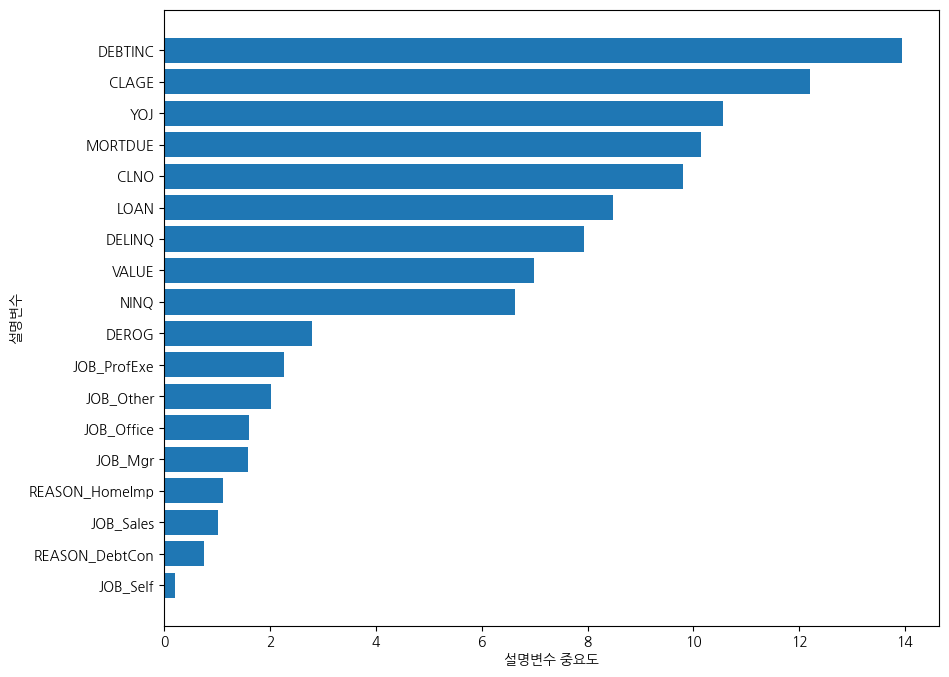

In [74]:
fig, ax = plt.subplots(figsize = (10, 8))
df_cbc_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_cbc_importance))
plt.barh(y = coordinates, width = df_cbc_importance["Importance"])
plt.yticks(coordinates, df_cbc_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 서포트 벡터 머신

In [75]:
# 데이터 구성: Sereis, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
# 모델 생성
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.908


In [77]:
# 모델 옵션 확인
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [78]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_c = [10 ** c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908
4,100.00,0.909,0.909


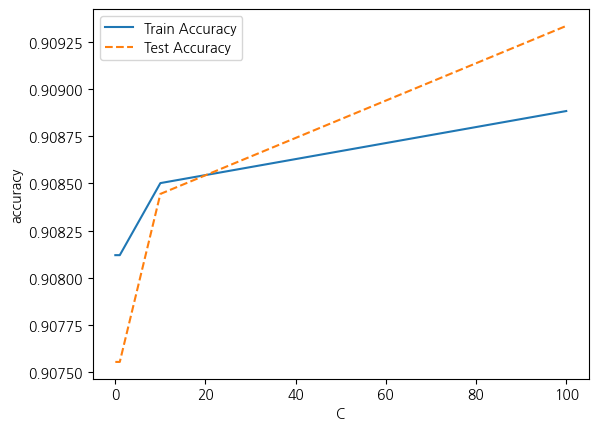

In [79]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

In [84]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# gamma: 규제(0.01,0.1,1,10)
para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.908
1,0.10,1.0,0.908
2,1.00,1.0,0.908
3,10.00,1.0,0.908


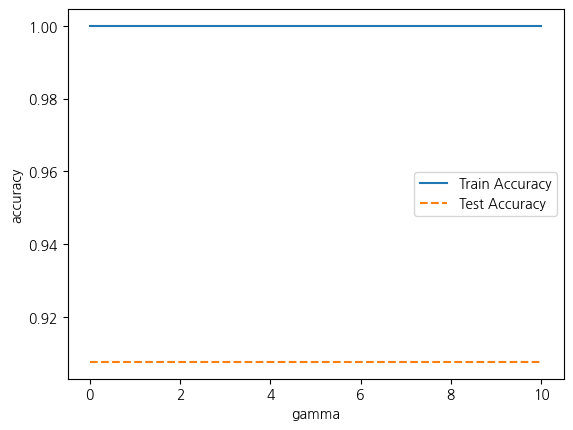

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

In [87]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [91]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=1234)

print("train data size : {}".format(df_scaled_train.shape))
print("test data size : {}".format(df_scaled_test.shape))

train data size : (2623, 18)
test data size : (1125, 18)


In [92]:
# 모델 생성
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.944
Accuracy on test set: 0.935


In [99]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.1~2.0)
para_c = [c*0.1 for c in range(1, 21)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.908,0.908
1,0.2,0.912,0.908
2,0.3,0.920,0.913
3,0.4,0.928,0.920
4,0.5,0.934,0.925
5,0.6,0.937,0.929
6,0.7,0.938,0.930
7,0.8,0.941,0.932
8,0.9,0.942,0.932
9,1.0,0.944,0.935


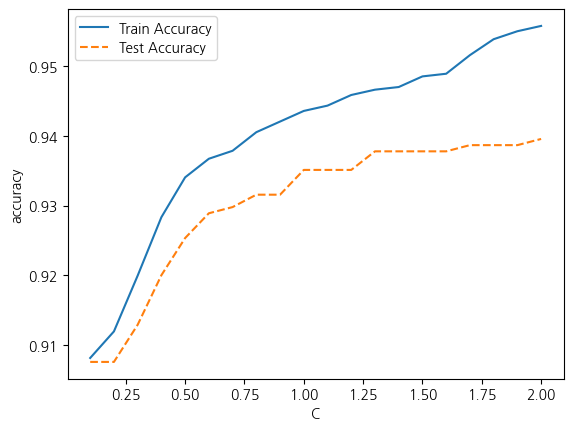

In [100]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

# C = 1.3

In [105]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# para_gamma = [10**gamma for gamma in range(-2,2)]
para_gamma = [0.05*gamma for gamma in range(1, 15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1.3, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.944,0.935
1,0.10,0.965,0.943
2,0.15,0.976,0.946
3,0.20,0.980,0.940
4,0.25,0.984,0.935
5,0.30,0.985,0.932
6,0.35,0.986,0.931
7,0.40,0.988,0.930
8,0.45,0.990,0.929
9,0.50,0.992,0.929


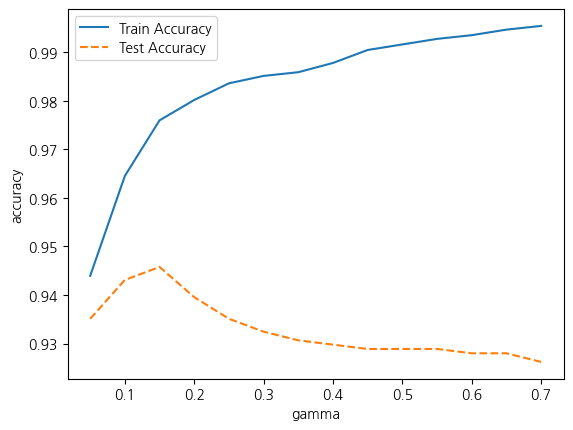

In [106]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

# gamma = 0.15

In [110]:
# 최종 모델
svc_final = SVC(gamma = 0.15, C = 1.3, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.976
Accuracy on test set: 0.946
Confusion Matrix: 
[[1021    0]
 [  61   43]] 

              precision    recall  f1-score   support

           0      0.944     1.000     0.971      1021
           1      1.000     0.413     0.585       104

    accuracy                          0.946      1125
   macro avg      0.972     0.707     0.778      1125
weighted avg      0.949     0.946     0.935      1125



In [ ]:
import warnings
warnings.filterwarnings("ignore")

estimator = SVC(random_state = 1234)

# 구하고자 하는 parameter와 범위
param_grid= {"C" : para_c, "gamma" : para_gamma}

# 설명력이 높은 최적 parameter 찾기
grid_svc = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_svc.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter: \n{}".format(grid_svc.best_params_))
print("\nbest score: \n{}".format(grid_svc.best_score_.round(3)))